[[ 3.29033933e-01 -1.24413881e+00  5.36476909e+02]
 [ 6.96976391e-01 -8.93590907e-02 -8.03406850e+01]
 [ 4.05117296e-04 -1.07974010e-03  1.00000000e+00]]


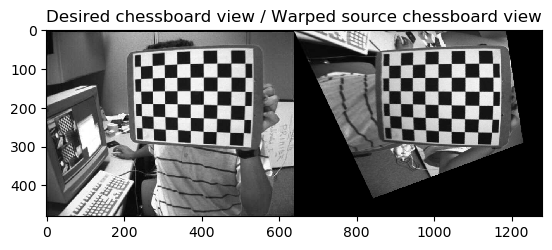

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import sys


def randomColor():
    color = np.random.randint(0, 255,(1, 3))
    return color[0].tolist()

def  perspectiveCorrection(img1Path, img2Path ,patternSize ):
    img1 = cv.imread(cv.samples.findFile(img1Path))
    img2 = cv.imread(cv.samples.findFile(img2Path))

    # [find-corners]
    ret1, corners1 = cv.findChessboardCorners(img1, patternSize)
    ret2, corners2 = cv.findChessboardCorners(img2, patternSize)
    # [find-corners]

    if not ret1 or not ret2:
        print("Error, cannot find the chessboard corners in both images.")
        sys.exit(-1)

    # [estimate-homography]
    H, _ = cv.findHomography(corners1, corners2)
    print(H)
    # [estimate-homography]

    # [warp-chessboard]
    img1_warp = cv.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
    # [warp-chessboard]

    img_draw_warp = cv.hconcat([img2, img1_warp])
    plt.imshow(img_draw_warp )
    plt.title("Desired chessboard view / Warped source chessboard view")
    
    corners1 = corners1.tolist()
    corners1 = [a[0] for a in corners1]

    # [compute-transformed-corners]
    img_draw_matches = cv.hconcat([img1, img2])
    for i in range(len(corners1)):
        pt1 = np.array([corners1[i][0], corners1[i][1], 1])
        pt1 = pt1.reshape(3, 1)
        pt2 = np.dot(H, pt1)
        pt2 = pt2/pt2[2]
        end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
        cv.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, randomColor(), 2)

    # plt.imshow(img_draw_matches)
    # [compute-transformed-corners]

def main():
    img1Path = "left02.jpg"
    img2Path = "left01.jpg"
    h = 6
    w = 9
    perspectiveCorrection(img1Path, img2Path, (w, h))

if __name__ == "__main__":
    main()